# Exercise 11 - Monte Carlo

### Tone Alsvik Finstad

In [1]:
import numpy as np
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import random


1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

[1000, 1000, 995, 992, 982, 969, 955, 933, 905, 882, 853, 820, 787, 743, 700, 664, 628, 589, 550, 522, 484, 446, 408, 379, 347, 323, 297, 274, 243, 219, 204, 188, 166, 156, 135, 116, 99, 86, 74, 65, 51, 43, 33, 27, 20, 20, 18, 12, 11, 9, 8, 4, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 5, 8, 18, 31, 45, 67, 95, 118, 147, 180, 213, 257, 300, 336, 372, 411, 450, 478, 516, 554, 592, 621, 653, 677, 703, 726, 757, 781, 796, 812, 834, 844, 865, 884, 901, 914, 926, 935, 949, 957, 967, 973, 980, 980, 982, 988, 989, 991, 992, 996, 998, 999, 999, 999, 999, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 100

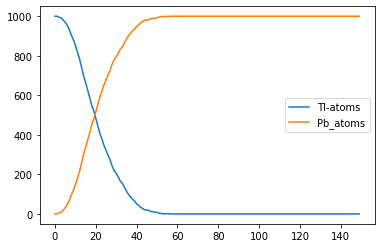

In [2]:

tau=3.052 * 60 #s
time=np.arange(0,150,1)

def p(t):
    return (1-2**(-t/tau))


def lcg(m=2**32, a=1103515245, c=12345):
    # get seed
    global x
    x = (a*x + c) % m
    return x/m

Tl_atoms=[1000]
Pb_atoms=[0]

for i in range(len(time)-1):
    atoms_decayed=0
    x = random.randint(0,1000)
    random_numbers=[lcg() for i in range(Tl_atoms[i])]
    for num in random_numbers:
        if num<p(time[i]):
            atoms_decayed+=1
    Tl_atoms.append(Tl_atoms[i]-atoms_decayed)
    Pb_atoms.append(Pb_atoms[i]+atoms_decayed)
print(Tl_atoms)
print(Pb_atoms)

plt.plot(time, Tl_atoms, label="Tl-atoms")
plt.plot(time, Pb_atoms, label="Pb_atoms")
plt.legend()
plt.show()

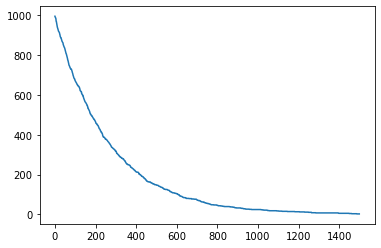

In [3]:
#Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability 
#distribution  𝑝(𝑡)=2−𝑡/𝜏ln2𝜏  to represent the times of decay of the 1000 Tl atoms. 
#Make a plot showing the number of atoms that have not decayed as a function of time.
def p2(t):
    #return 2**((-t/tau)*(np.log(2)/2))
    return - tau*np.log(1-y)/np.log(2)  #inverse probability function

t=1500
Tl_atoms=1000

y = np.random.random(Tl_atoms)
time_decay = p2(y)
Tl_num = []
for i in range(1,t):
    decayed = len(time_decay[i>time_decay])
    Tl_num.append(Tl_atoms - decayed)

plt.plot(Tl_num)
plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

In [4]:
def f(x):
    return (np.sin(1/(1-x)))**2

In [5]:
#Hit/miss method
N=1000
I_list = np.zeros(N) 
for i in range(N):
    n = 100000
    count = 0
    x = 2*np.random.random()
    y = np.random.random() 
    if y < f(x): 
        count += 1
    I_list[i] = 2*count/n

print(f"Mean value = { np.mean(I_list)}")
print(f"Standard deviation = {np.std(I_list)}")

Mean value = 1.3180000000000001e-05
Standard deviation = 9.480907129594721e-06


In [6]:
#mMean value method
x = 2*np.random.random(N)
I = (2/N)*np.sum(f(x))
    
std = 2*np.sqrt(np.var(f(x)/N))
print('Integral:', I)
print('Standard deviation: ', std)

Integral: 1.3362132796351511
Standard deviation:  0.0006588724771703291


The standard deviation is a lot smaller for the hit/miss method, and for that reason this is the best method for this case. 

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [7]:
def f(x, y):
    return np.sum((x**2+y**2<=1))

In [8]:
#Circle of unit radius
N = 19000000
x = 2*np.random.random(N)-1
y = 2*np.random.random(N)-1
V = 2**2
I = V/N * f(x, y)
print(f"Area = {I.round(5)}")

Area = 3.14217


In [9]:
#10 dimensional sphere
def f_10D(x):
    return np.sum((np.sum(x**2, axis = 0) <=1))

In [10]:
N = 1900000
coords = 2*np.random.random((10,N))-1
V_10D = 2**10
I_10D = V_10D/N * f_10D(coords)
print(f"Area = {I_10D}")

Area = 2.5745515789473683


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [11]:
def w(x):
    return 1/np.sqrt(x)

def integrand(x):
    return x**(-1/2) / (np.exp(x) + 1)

N=100
x = np.linspace(0.001,1,100)
dx = x[1]-x[0]
I = (1/N)*np.sum(integrand(x)/w(x))*np.sum(w(x))*dx
print(f"The value of the integral is: {I}")

The value of the integral is: 0.8222570763381689


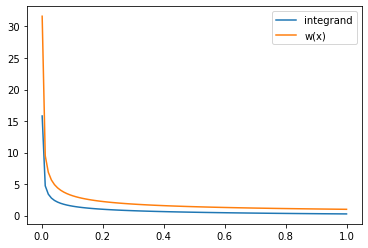

In [12]:
integ_plot = integrand(x)
w_plot = w(x)
plt.plot(x, integ_plot, label="integrand")
plt.plot(x, w_plot, label="w(x)")
plt.legend()
plt.show()